LAB: Visualización de datos usando Matplotlib
==========================================

In [68]:
## inicialización
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import matplotlib.lines as mlines
%matplotlib inline

## Punto 1

Construya una gráfica similar a la siguiente usando el archivo `indicadores-mundiales.csv`. Se grafica la suma del porcetaje de la población por regiones.

![act2](images/suma-pob-region-edades-2.png)


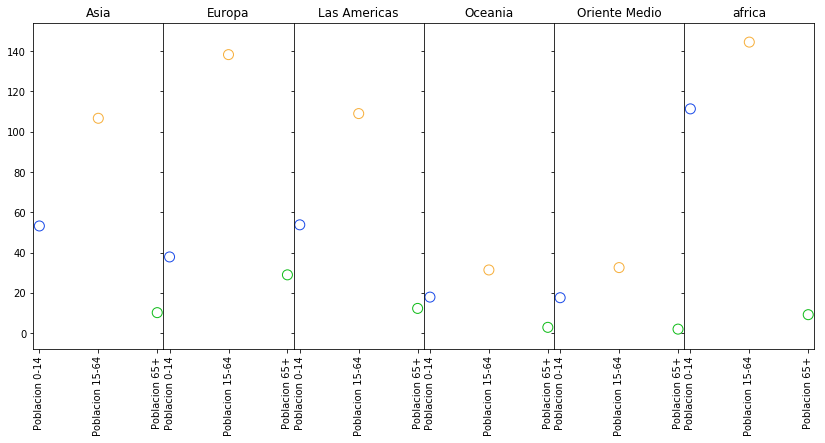

In [70]:
df = pandas.read_csv('indicadores-mundiales.csv',sep=',', encoding='latin-1')


Region_Grupo=df[['Region', 'Poblacion 0-14','Poblacion 15-64','Poblacion 65+']]
Region_Grupo = Region_Grupo.groupby('Region').sum()[['Poblacion 0-14', 'Poblacion 15-64', 'Poblacion 65+']]/100
Region_GrupoT = Region_Grupo.T

fig, axs = plt.subplots(1, 6, sharex='col', sharey='row', figsize=(14, 6));
plt.subplots_adjust(wspace = 0, hspace=0.1)
plt.style.use('default')
colors = ['#1b4be8', '#f7af3b', '#10bc19']
for i, colname in enumerate(Region_GrupoT.columns):
    axs[i].scatter(list(Region_GrupoT.index), Region_GrupoT[colname], s=100, edgecolors=colors, linewidths=1, facecolors='none')
    axs[i].set_title(colname)
    plt.style.use('default')
    for tick in axs[i].get_xticklabels():
        tick.set_rotation(90)

## Punto 2

Construya una gráfica similar a la siguiente usando el archivo `indicadores-mundiales.csv`. Se grafica la suma del porcetaje de la población por regiones.

![act2](images/suma-pob-region-edades-3.png)


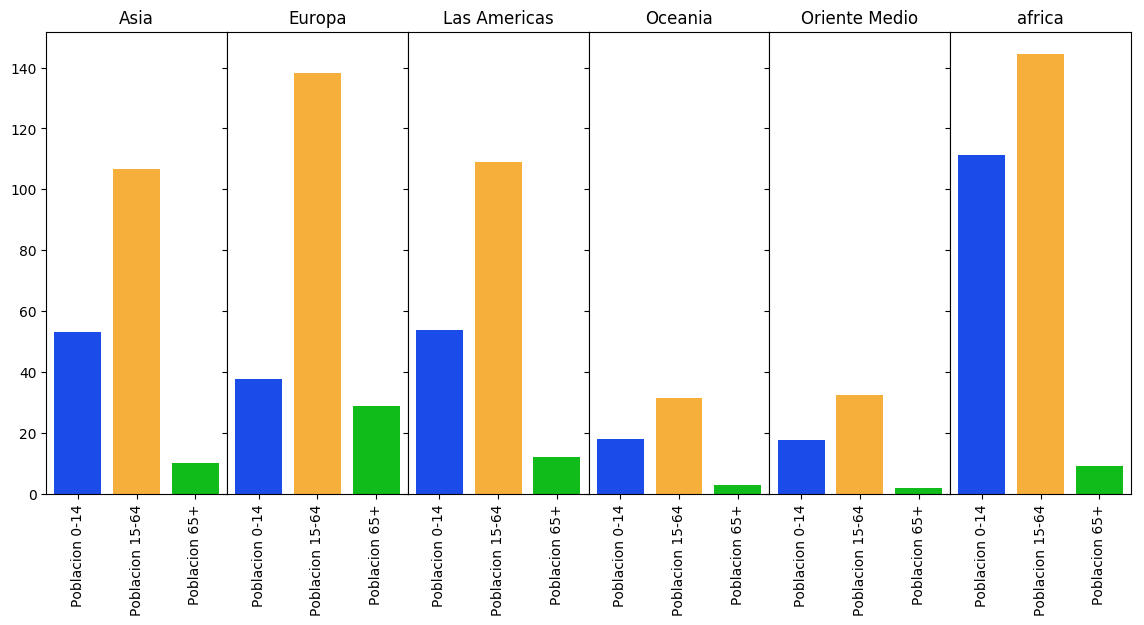

In [71]:
df = pandas.read_csv('indicadores-mundiales.csv',sep=',', encoding='latin-1')
Region_Grupo1=df[['Region', 'Poblacion 0-14','Poblacion 15-64','Poblacion 65+']]
Region_Grupo1 = Region_Grupo1.groupby('Region').sum()[['Poblacion 0-14', 'Poblacion 15-64', 'Poblacion 65+']]/100
Region_Grupo1 = Region_Grupo1.sort_values('Region')
Region_Grupo1T = Region_Grupo1.T

fig, axs = plt.subplots(1, 6, sharex='col', sharey='row', figsize=(14, 6));
plt.subplots_adjust(wspace = 0, hspace=0.1)
plt.style.use('default')
colors = ['#1b4be8', '#f7af3b', '#10bc19']
for i, colname in enumerate(Region_Grupo1T.columns):
    axs[i].bar(list(Region_Grupo1T.index), Region_Grupo1T[colname], color=colors)
    axs[i].set_title(colname)
    plt.style.use('default')
    for tick in axs[i].get_xticklabels():
        tick.set_rotation(90)

## Punto 3
Construya una gráfica similar a la siguiente usando el archivo `indicadores-mundiales.csv`. Se grafica la suma del porcetaje de la población por regiones.

![act3](images/suma-pob-region-edades-4.png)

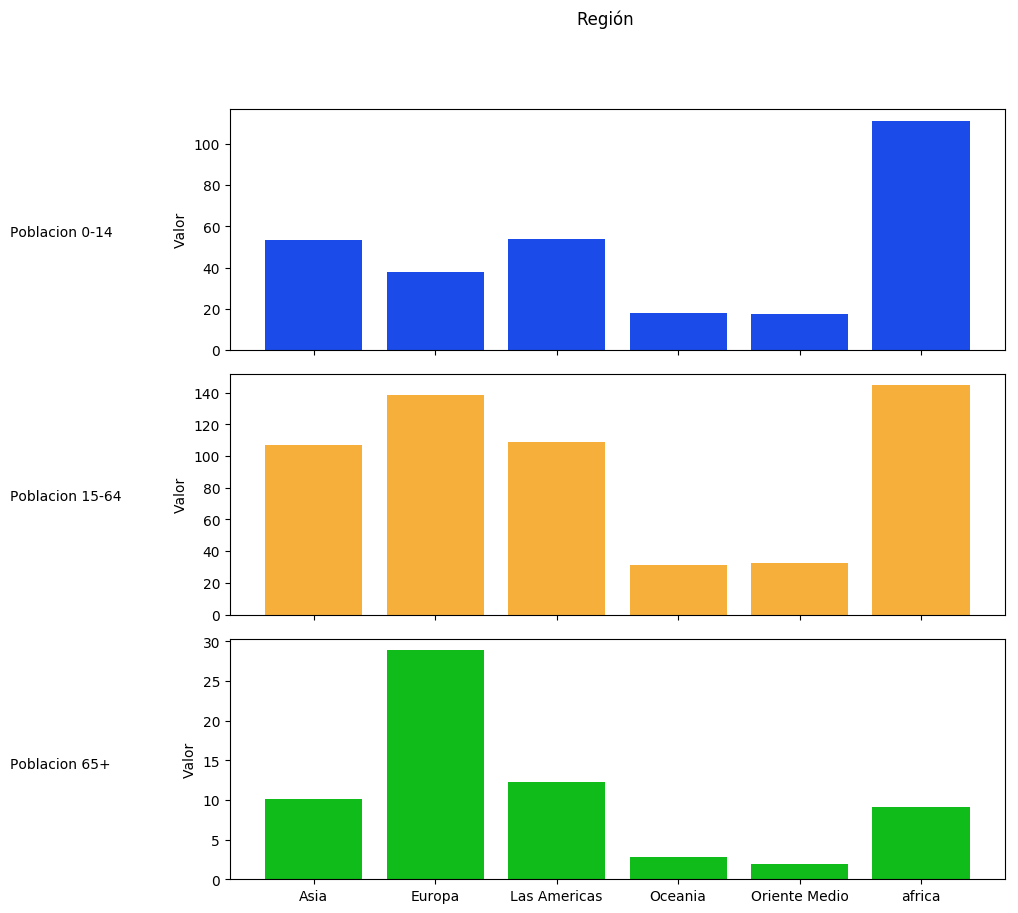

In [72]:
df = pandas.read_csv('indicadores-mundiales.csv',sep=',', encoding='latin-1')
Region_Grupo=df[['Region', 'Poblacion 0-14','Poblacion 15-64','Poblacion 65+']]
Region_Grupo = Region_Grupo.groupby('Region').sum()[['Poblacion 0-14', 'Poblacion 15-64', 'Poblacion 65+']]/100
fig, axs = plt.subplots(3, figsize=(10, 10), sharex=True);
plt.subplots_adjust(wspace = 0.00, hspace=0.1)
fig.suptitle("Región")
colors = ['#1b4be8', '#f7af3b', '#10bc19']
for index, colname in enumerate(Region_Grupo.columns):
    axs[index].bar(list(Region_Grupo.index), Region_Grupo[colname], color=colors[index])
    axs[index].text(-2.5, int(max(list(Region_Grupo[colname])) / 2), s=colname)
    axs[index].set_ylabel('Valor')

## Punto 4

Construya una gráfica similar a la siguiente usando el archivo `indicadores-mundiales.csv`. Promedio de gastos per capita por año.

![act4](images/prom-gastos-salud-per-capita-ano.png)

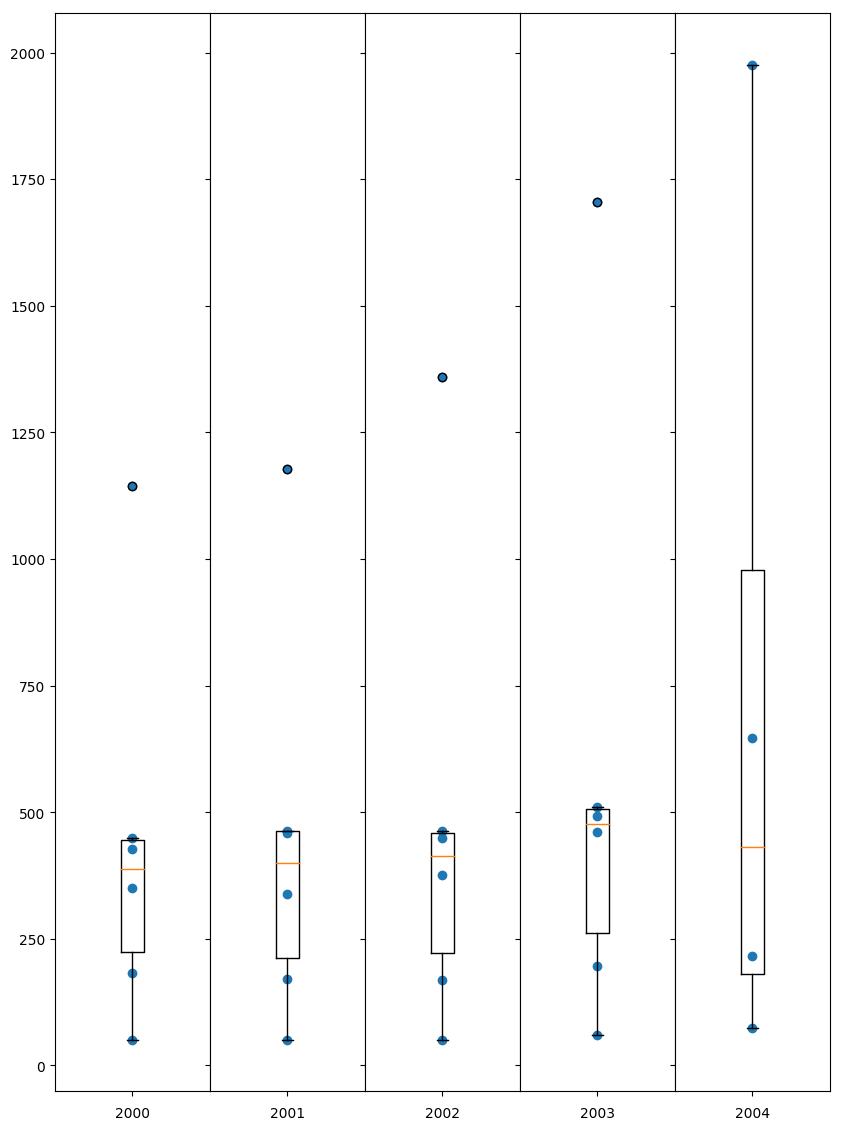

In [61]:
df = pandas.read_csv('indicadores-mundiales.csv',sep=',', encoding='latin-1')
df['Ano'] = pd.to_datetime(df['Ano'])
df['Año'] = df['Ano'].map(lambda x: x.year)
Dispercion = df.groupby(['Año', 'Region'])['Gasto en salud (per capita)'].mean()
Dispercion=Dispercion.to_frame()
Dispercion.reset_index(inplace=True)  
Dispercion=Dispercion.drop(['Region'], axis=1)
aux4 = Dispercion.dropna()


fig, axs = plt.subplots(1, 5, sharex='col', sharey='row', figsize=(10, 14));
plt.xticks(rotation='vertical')
plt.subplots_adjust(wspace = 0, hspace=0)
colors = ['#1b4be8', '#f7af3b', '#10bc19']
plt.style.use('default')
for i, colname in enumerate(aux4['Año'].unique()):
    axs[i].boxplot(list(aux4[aux4['Año'] == colname].T.values[1]))
    axs[i].scatter(np.ones(aux4[aux4['Año'] == colname]['Gasto en salud (per capita)'].shape[0]), aux4[aux4['Año'] == colname]['Gasto en salud (per capita)'])
    axs[i].set_xticklabels([""])
    axs[i].set_xlabel(colname)
    for tick in axs[i].get_xticklabels():
        tick.set_rotation(0)


## Punto 5

Construya una gráfica similar a la siguiente usando el archivo `indicadores-mundiales.csv`. Promedio de gastos per capita por año.

![act5](images/prom-region-edades-ano.png)

Text(0.5, 0.98, 'Region/Ano')

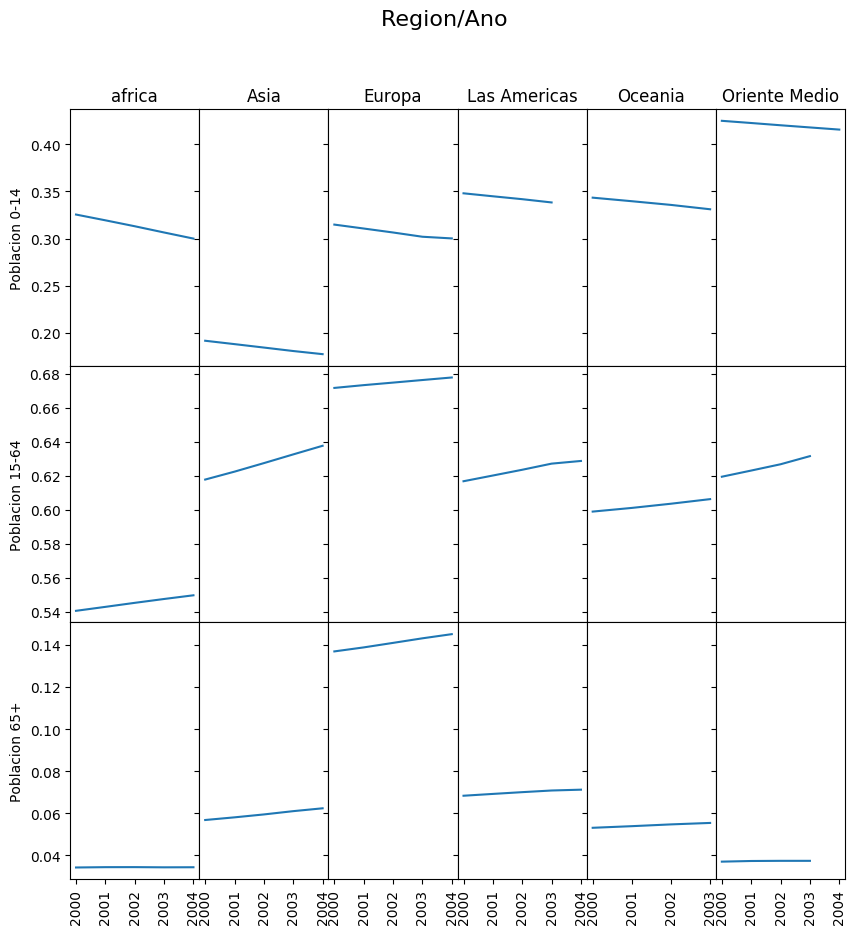

In [81]:
df = pandas.read_csv('indicadores-mundiales.csv',sep=',', encoding='latin-1')
soloano=[]
soloano = [ z.split('-')[0] for z in df.Ano]
df['soloano']=soloano

Anios= df.soloano.unique()
AUX=pd.DataFrame()
fig1, axs = plt.subplots(3, 6, sharex='col', sharey='row', figsize=(10, 10))
plt.xticks(rotation='vertical')
plt.subplots_adjust(wspace = 0, hspace=0)
plt.style.use('default')
lista=['Poblacion 0-14','Poblacion 15-64','Poblacion 65+']
for w, indname in enumerate(lista):
    for i, Anio in enumerate(Anios):
        y=(df[df['soloano'] == Anio].groupby('Region')[indname].mean()/100)
        AUX[Anio]=y
        y=[]
    AUX.index=df['Region'].unique()
    AUXT=AUX.T
    for i, colname in enumerate(AUXT.columns):
        axs[w,i].plot(AUXT[colname])
        if w==0:
            axs[w,i].set_title(colname)
        if i==0:
            axs[w,i].set_ylabel(indname)
        for tick in axs[w,i].get_xticklabels():
            tick.set_rotation(90)
fig1.suptitle('Region/Ano', fontsize=16)

---